# Graphical user interface design to Superpose two Non-Deterministic finite automaton. 

### Definning NDF Automaton and converting it into it s-word counterpart conatinning records.

In [1]:
from automata.fa.nfa import NFA
from visual_automata.fa.nfa import VisualNFA
from tkinter import *
from tkinter import font as tkFont
import  tkinter as tk
from PIL import ImageTk, Image
from pdf2image import convert_from_path
import os, copy

class NFA:
    #Constructor class
    def __init__(self):
        self.init = "q0" #initalState(str)
        
        self.final = set()  #finalState(set)
        
        self.trans = {}  # dict with key = previousState (number) containing a dict as value
                         #      with key = act 
                         #           val = set of poststates (numbers)
    
    
    #To accept the action transition or not.
    def accept(self,strList):
        if len(strList) == 0:
            if self.init in self.final:
                ans = "accepted"
            else:
                ans = "rejected"
        else:
            stateList = [self.init]
            print("StateList",stateList)
            ans = "rejected"
            for state in self.steps(strList, stateList):
                print("State",state)
                if state in self.final:
                    ans = "accepted"
                    break
        return ans
    
    def steps(self, strList, stateList):
        if len(strList) == 1:
            temp = self.step(strList[0],stateList)
        elif len(strList) > 1:
            symbol = strList[0]
            tail = strList[1:]
            print("Symbol:",symbol)
            print("tail:",tail)
            temp = self.steps(tail, self.step(symbol,stateList))
        return(temp)

    def step(self, symbol, stateList):
        temp = []
        for state in stateList:
            if state in self.trans:
                if symbol in self.trans[state]:
                    for next in self.trans[state][symbol]:
                        print("Next:",next)
                        temp.append(next)
        print("temp:",temp)
        return(temp)
    
    #To accept the State transition or not.
    def acceptState(self,strList):
        temp = []
        tempStore = []
        ans = "rejected"
        for i in strList:
            for key, value in self.stateD.items():
                if i == str(value):
                    temp.append(key)
        print(temp)
        for i in range(len(temp)):
            start = temp[0]
            upcome = temp[1:]
            if start in self.trans:
                for value in self.trans[start].values():
                    try:
                        if (value.pop()) == upcome[0]:
                            temp = upcome
                    except:
                        break
        print(set(temp))
        if self.final == set(temp):
            ans = "accepted"
        return ans
    
    # Converting the finite automaton into its S-word counterpart.
    def make_sfa(self,label):
        temp = sfa()
        temp.labels = { label }
        print("Labels:",temp.labels)
        invStateD = { self.init : 0 }
        print("invStateD:",invStateD)
        istate = 1
        print("trans:",self.trans)
        

        for i in self.trans: #iterate over prevState
            print ("prevState:", i)
            if not(i in invStateD):
                invStateD[i] = { istate }
                istate += istate 
            print("Changed[invStateD]:",invStateD)
            temp.trans[invStateD[i]] = {}
            print("Changed[trans]:",temp.trans)
            poststates = set()
            for act in self.trans[i]: #iterate over actions
                print("act:",act)
                print("s2s:",s2s({act}))
                temp.actD[s2s({act})] ={ act }
                for post in self.trans[i][act]: #iterate over postState 
                    if not(post in invStateD):
                        invStateD[post] = istate
                        istate += istate        
                    poststates.add(invStateD[post])
                print("poststates", poststates)
                temp.trans[invStateD[i]] = dicMerge(temp.trans[invStateD[i]],
                                                    { s2s({act}): poststates })
            print("Updated[trans]:",temp.trans)
        print("Updated[invStateD]", invStateD)
        for i in invStateD:
            temp.stateD[invStateD[i]] = { label : i }
            if i in self.final:
                temp.final.add(invStateD[i])
        print("temp.stateD[Final]", temp.stateD)
        print("temp.final", temp.final)
        return temp

    # sfa = set/structured finite automata (for S-words)
    # nfa with trans given for states and acts described by dictionaries 
    # stateD decoding/structuring state as a dictionary [record]
    # actD decoding str(act) [better: s2s(act)] to expose the set behind act
    # plus
    # labels used by stateD to describe states
    # make disjoint from other sfa to keep information private
    # and method accS for accept given a list of sets (internally representing
    #                                   a set qua symbol as the string from s2s)

# child class of NFA  
class sfa(NFA):

#  init = 0
#  stateD = {}
#  actD = {}
#  labels = { "need to fix for use in stateD" }                 

    def __init__(self):
        super().__init__()
        self.init = 0
        self.final = set()
        self.stateD = { 0:{} }
        self.actD = {}
        self.labels = { "need to fix for use in stateD" }                 

    def accS(self,listSet):
        print("Initiali/p:",sfaInput(listSet))
        return self.accept(sfaInput(listSet))
    
    def mapper(self,st):
        print("Initiali/p:",stateInput(st))
        return self.acceptState(stateInput(st))  

def stateInput(listSet):
    temp = []
    for i in listSet:
        temp.append(str(i))
    return temp

def sfaInput(listSet):
    temp = []
    for i in listSet:
        temp.append(s2s(i))
    return temp
    
# variant of str(set0) s.t. s2s({-1,-3,-2}) == s2s({-2,-3,-1})
def s2s(set0):
    temp = []
    for i in set0:
        temp.append(i)
    temp.sort()
    return str(temp)

def dicMerge(dic1,dic2):
    temp = dic1.copy()
    for key in dic2:
        if key in dic1:
            temp[key] = temp[key].union(dic2[key])
        else:
            temp[key] = dic2[key]
    return temp
    

def uld(a):   # encode interval a in action (public) but not in state (private)
    temp = NFA()
    temp.init = "u"      # + "(" + str(a) + ")"
    temp.final = {"d"}   # + "(" +str(a) + ")"}
    la = "l"             # +"("+str(a)+")"
    temp.trans = { temp.init: {a: {la}},
                   la: {-a: temp.final}  }
    return temp

# Superposing two definite automaton of s-words.
def sup(sfa1,sfa2,voc1,voc2): 
    print("sfa1.init:",sfa1.init)
    print("sfa2.init:",sfa2.init)
    print("voc1:",voc1)
    print("voc2:",voc2)
    
    temp = sfa()
    temp.stateD = { 0: {1:sfa1.init, 2:sfa2.init} }
    print("StateD:",temp.stateD)
    newp = {(sfa1.init,sfa2.init)}
    print("newp:",newp)
    done = set()
    while not(newp==set()):
        print(".\n")
        nextp = set()
        for q in newp:
            print("parentNode:",q)
            morecu = rulecu(sfa1,sfa2,voc1,voc2,q,temp)
            print("morecu:",morecu)
            mored1 = ruled1(sfa1,voc2,q,temp)
            print("mored1:",mored1)
            mored2 = ruled2(sfa2,voc1,q,temp) 
            print("mored2:",mored2)
            morep = morecu.union(mored1.union(mored2))
            print("morep:",morep)
            nextp = nextp.union(morep)
            print("newNextp:",nextp)
        done = done.union(newp)
        print("done:",done)
        newp = nextp.difference(done)
        print("newnewp:",newp)
    for i in temp.stateD:
        if temp.stateD[i][1] in sfa1.final and temp.stateD[i][2] in sfa2.final:
            temp.final.add(i)
    #  unwind temp.stateD using sfa1, sfa2
    temp.stateD = unwindSD(temp.stateD,sfa1.stateD,sfa2.stateD)
    temp.labels = sfa1.labels.union(sfa2.labels)
    return temp

def unwindSD(sD,sD1,sD2):
    temp = {}
    for i in sD:
    # flatten:        
        temp[i] = dicUnion(sD1[sD[i][1]],sD2[sD[i][2]])
    return temp

# Python code to convert string to list
def listify(arg):
    return arg if isinstance(arg, list) else [arg]

def dicUnion(dic1,dic2):
    temp = dic1.copy()
    for key in dic2:
        if key in temp:
            if not(dic2[key] == temp[key]):
                print("Clashing keys/labels (dicUnion)")
        temp[key] = dic2[key]
    return temp
        
def rulecu(sfa1,sfa2,voc1,voc2,q,temp): # cu add to p [side-effects on temp]
    morep = set()
    moretrans = {}
    if (q[0] in sfa1.trans  and  q[1] in sfa2.trans):
        for a1 in sfa1.trans[q[0]]:
            for a2 in sfa2.trans[q[1]]:
                s1 = sfa1.actD[a1]
                s2 = sfa2.actD[a2]
                s = s1.union(s2)
                if contain(s1,voc2,s2) and contain(s2,voc1,s1):
                    for r1 in sfa1.trans[q[0]][a1]:
                        for r2 in sfa2.trans[q[1]][a2]:
                            r = (r1,r2)
                            morep.add(r)
                            temp.actD[s2s(s)] = s
                            add2stateD(temp,r)
                            qcode = decodeState(temp,q)
                            di = {s2s(s): {decodeState(temp,r)}} 
                            if qcode in temp.trans:
                                temp.trans[qcode] = dicMerge(temp.trans[qcode],
                                                             di)
                            else:
                                temp.trans[qcode] = di
    return morep

def ruled1(sfa1,voc2,q,temp): # d1 add to p [side-effects on temp]
    morep = set()
    moretrans = {}
    if q[0] in sfa1.trans:
        for a1 in sfa1.trans[q[0]]:
            s = sfa1.actD[a1]
            if contain(s,voc2,set()):
                for r1 in sfa1.trans[q[0]][a1]:
                    r = (r1,q[1])
                    morep.add(r)
                    temp.actD[s2s(s)] = s
                    add2stateD(temp,r)
                    qcode = decodeState(temp,q)
                    di = {s2s(s): {decodeState(temp,r)}} 
                    if qcode in temp.trans:
                         temp.trans[qcode] = dicMerge(temp.trans[qcode],
                                                      di)
                    else:
                         temp.trans[qcode] = di
    return morep

def ruled2(sfa2,voc1,q,temp): # d2 add to p [side-effects on temp]
    morep = set()
    moretrans = {}
    if q[1] in sfa2.trans:
        for a2 in sfa2.trans[q[1]]:
            s = sfa2.actD[a2]
            if contain(s,voc1,set()):
                for r2 in sfa2.trans[q[1]][a2]:
                    r = (q[0],r2)
                    morep.add(r)
                    temp.actD[s2s(s)] = s
                    add2stateD(temp,r)
                    qcode = decodeState(temp,q)
                    di = {s2s(s): {decodeState(temp,r)}} 
                    if qcode in temp.trans:
                         temp.trans[qcode] = dicMerge(temp.trans[qcode],
                                                      di)
                    else:
                         temp.trans[qcode] = di
    return morep

def add2stateD(sfa,r):
    old = False
    for i in sfa.stateD:
        if sfa.stateD[i]=={1:r[0], 2:r[1]}:
            old = True
    if old == False:
        sfa.stateD[len(sfa.stateD)] = {1:r[0], 2:r[1]}

def decodeState(sfa,r):
    found = -1
    for i in sfa.stateD:
        if sfa.stateD[i]=={1:r[0], 2:r[1]}:
            found = i
    return found

def contain(set1,set2,set3):
    return set1.intersection(set2).issubset(set3)

def voc(n):
    return {n,-n}

def vocA(n):
    temp = voc(n)
    if n == 1:
        return temp
    elif 1<n:
        return temp.union(vocA(n-1))


#Superposing more than two automaton of s-words.
def supULD(n):
    temp = uld(n).make_sfa(n)
    if n == 1:
        return temp
    elif 1<n:
        return sup(temp,supULD(n-1),voc(n),vocA(n-1))
    
def itemize(dic):
    for i in dic:
        print(i," ", dic[i], " end of item")


# Graphical user interface build upon superposing functionalities
def transition(dict1,dict2,end):
    x = end.pop()
    tempDict = dict1.copy()
    for i in dict1.keys():
        for j in dict2.keys():
            if i == j:
                tempDict[str(dict2[j])] = tempDict[i]
                del tempDict[i]
    tempDict[str(dict2[x])] = {'.' : {str(dict2[x])}}
    return tempDict

def transitionSwords(dict1,dict2,end):
    x = end.pop()
    tempDict = dict1.copy()
    visited = set()
    for i in dict1.keys():
        for j in dict2.keys():
            if j not in visited:
                visited.add(j)
                tempDict[str(dict2[j])] = tempDict[i]
                del tempDict[i]
                print(visited)
                break
    tempDict[str(dict2[x])] = {'' : {str(dict2[x])}}
    return tempDict

def actions(dict):
    temp = set()
    for i in dict.keys():
        for j in dict[i].keys():
            if j not in temp:
                temp.add(j)
    return temp

def state(dict):
    temp = set()
    for i in dict.keys():
        temp.add(i)
    return temp

def convertStateD(dict):
    temp = ()
    dtemp = {}
    for i,j in dict.items():
        temp = str(j)
        dtemp[i] = temp.replace(":", '-')
    return dtemp

def finalTransition(dict1, dict2):
    for i in dict1.keys():
        for j in dict1[i].keys():
            for k in dict2.keys():
                if dict1[i][j] == set([k]):
                    dict1[i][j] = {str(dict2[k])}
    return dict1

def finalTransitionSwords(dict1, dict2):
    visited = set()
    l = 1
    tempDict = copy.deepcopy(dict1)
    for i in dict1.keys():
        for j in dict1[i].keys():
            for k in list(dict2.values())[l:]:
                if k not in visited:
                    visited.add(k)
                    tempDict[i][''] = listify(i)
                    tempDict[i][j] = listify(k)
                    l=l+1
                    break
            break
    return tempDict

def initial(dict):
    temp = str(dict[0])
    return temp

def finale(dict,end):
    temp = str(dict[end.pop()])
    return set(temp)

def removeState(dict1,dict2,end):
    x = end.pop()
    temp = copy.deepcopy(dict1)
    print("lol",temp[str(dict2[x])])
    del temp[str(dict2[x])]
    return temp


def demo():
    fa1 = uld(1)
    print(" ULD for interval 1 from fa1 = uld(1)")
    print("fa1.init= ", fa1.init)
    print("fa1.final= ", fa1.final)
    print("fa1.trans= ", fa1.trans)
    fa2 = uld(2)
    print(" ULD for interval 2 from fa2 = uld(2)")
    print("fa2.init= ", fa2.init)
    print("fa2.final= ", fa2.final)
    print("fa2.trans= ", fa2.trans)
    print("END")
    
    print("\n")
    f1 = fa1.make_sfa(1)
    print("\n")
    f2 = fa2.make_sfa(2)
    print("\n")
    print("An sfa has attributes init,final,trans + labels,stateD,actD")
    print(" f1 = fa1.make_sfa(1)")
    print("f1.labels= ", f1.labels)
    print("f1.stateD= ", f1.stateD)
    print("f1.actD= ", f1.actD)
    print("f1.init= ", f1.init)
    print("f1.final= ", f1.final)
    print("f1.trans= ", f1.trans)

    print("\n")
    print("An sfa has attributes init,final,trans + labels,stateD,actD")
    print(" f2 = fa2.make_sfa(1)")
    print("f2.labels= ", f2.labels)
    print("f2.stateD= ", f2.stateD)
    print("f2.actD= ", f2.actD)
    print("f2.init= ", f2.init)
    print("f2.final= ", f2.final)
    print("f2.trans= ", f2.trans)
    
    print("f1.accS([{1},{-1}]) =", f1.accS([{1},{-1}]))
    
    print("\n")
    print(" fa = sup(f1,f2,voc(1),voc(2))")
    fa = sup(f1,f2,voc(1),voc(2))
    
    print(".....\n")
    print("fa.trans[0]= ", fa.trans[0])
    print("fa.trans[1]= ", fa.trans[1])
    print("fa.trans[2]= ", fa.trans[2])
    print("fa.trans[3]= ", fa.trans[3])
    print("fa.trans[4]= ", fa.trans[4])
    print("fa.trans[5]= ", fa.trans[5])
    print("fa.stateD[0]= ", fa.stateD[0])
    print("fa.stateD[1]= ", fa.stateD[1])
    print("fa.stateD[2]= ", fa.stateD[2])
    print("fa.stateD[3]= ", fa.stateD[3])
    print("fa.stateD[6]= ", fa.stateD[6])
    print("fa.trans[1]= ", fa.trans[1])
    print("fa.stateD[4]= ", fa.stateD[4])
    print("fa.final= ", fa.final)

    print("...............\n")
    print("fa.accS([{-1,2},{-1,-2}]) =", fa.accS([{1,2},{-1,-2}]))
    print("...............\n")
    f3 = supULD(3)
    temp = copy.deepcopy(fa.trans)
    end = fa.final.copy()
    end1 = fa.final.copy()
    node = convertStateD(fa.stateD) 
    print("...............\n")
    print("Node",node)
    print("temp",temp)
    tranState = transition(temp,node,end)
    tranState1 = removeState(tranState,node,end1)

    
    print("tranState:",tranState)
    print("...............\n")
    print("actions:",actions(tranState1))
    print("States:",state(tranState))
    print("Transition:",finalTransition(tranState1,node))
    print("...............\n")
    print("Trans:",f1.trans)
    #print("start:",initial(fa.stateD))
    #print("finale:",finale(fa.stateD,end))
    nfa1 = VisualNFA(
    states= state(tranState),
    input_symbols=actions(tranState),
    transitions=finalTransitionSwords(tranState,node),
    initial_state=node[0],
    final_states={node[2]},
    )
    nfa = VisualNFA(nfa1)
    #nfa = VisualNFA(nfa1)"{1- 'u'}"
    print(nfa.table)
    #print(fa.final)
    print("...............\n")
    st = [{1: 'u', 2: 'u'}, {1: 'l', 2: 'u'}, {1: 'd', 2: 'l'}, {1: 'd', 2: 'd'}]
    print("fa.accState([{1: 'u', 2: 'u'}, {1: 'l', 2: 'l'}, {1: 'd', 2: 'd'}]) =", fa.mapper(st))
    print("...............\n")
    print("Trans:",fa.trans)
    print(fa.stateD)
    return nfa
    

{"mode":"full","isActive":False}

{'mode': 'full', 'isActive': False}

In [2]:
x = demo() 

 ULD for interval 1 from fa1 = uld(1)
fa1.init=  u
fa1.final=  {'d'}
fa1.trans=  {'u': {1: {'l'}}, 'l': {-1: {'d'}}}
 ULD for interval 2 from fa2 = uld(2)
fa2.init=  u
fa2.final=  {'d'}
fa2.trans=  {'u': {2: {'l'}}, 'l': {-2: {'d'}}}
END


Labels: {1}
invStateD: {'u': 0}
trans: {'u': {1: {'l'}}, 'l': {-1: {'d'}}}
prevState: u
Changed[invStateD]: {'u': 0}
Changed[trans]: {0: {}}
act: 1
s2s: [1]
poststates {1}
Updated[trans]: {0: {'[1]': {1}}}
prevState: l
Changed[invStateD]: {'u': 0, 'l': 1}
Changed[trans]: {0: {'[1]': {1}}, 1: {}}
act: -1
s2s: [-1]
poststates {2}
Updated[trans]: {0: {'[1]': {1}}, 1: {'[-1]': {2}}}
Updated[invStateD] {'u': 0, 'l': 1, 'd': 2}
temp.stateD[Final] {0: {1: 'u'}, 1: {1: 'l'}, 2: {1: 'd'}}
temp.final {2}


Labels: {2}
invStateD: {'u': 0}
trans: {'u': {2: {'l'}}, 'l': {-2: {'d'}}}
prevState: u
Changed[invStateD]: {'u': 0}
Changed[trans]: {0: {}}
act: 2
s2s: [2]
poststates {1}
Updated[trans]: {0: {'[2]': {1}}}
prevState: l
Changed[invStateD]: {'u': 0, 'l': 1}
Ch

InvalidStateError: end state 2 for transition on {1- 'u', 2- 'u'} is not valid

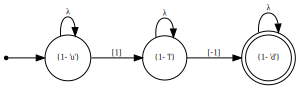

In [252]:
x.show_diagram(view=True)

[Rejected]                         
Step: Current state: Input symbol: New state:
1          →{1- 'u'}                →{1- 'u'}
2          →{1- 'u'}          [-1]          ∅

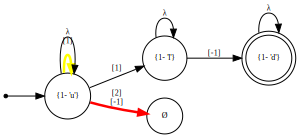

In [266]:
x.show_diagram({'','[1]','[-1]'})